# Statistics Review: Point Estimation & Confidence Intervals

#### *4 October 2019*
#### *DATA 1010*

In [1]:
using Plots, Distributions

The central problem of statistics is to make inferences about a population or data-generating process based on the information in a finite sample drawn from the population. Last class we talked about kernel density estimation, which directly estimates the distribution. Today we'll talk about estimating values which boil the distribution down to a single number.

---

**Point estimation** is the inference of a single real-valued feature of the distribution of the data-generating process (such as its mean, variance, or median).

## Problem 1

Run the code below to define a function called `mysteryRV` which can be called (with no arguments) to sample from an unknown distribution. Also defined is a function `check_mean` which can be called with a single argument to check whether the supplied value is close to the mean of the underlying distribution. Figure out how to ascertain the mean accurately enough to get `check_mean` to respond affirmatively. Repeat with `check_var` (also defined in "mystery-distribution.jl").

In [2]:
include("mystery-distribution.jl")

mysteryRV (generic function with 1 method)

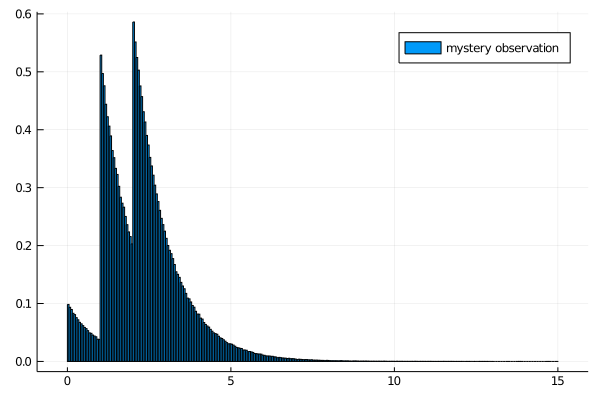

In [9]:
histogram([mysteryRV() for _ in 1:1_000_000], label="mystery observation", normed = true)

In [8]:
mysteryRV()

1.265276553796433

In [11]:
mean(mysteryRV() for _ in 1:1_000_000)

2.3013052724180394

In [12]:
check_mean(2.29)

"correct! The mean is 2.3"

In [14]:
mean((mysteryRV()-2.3)^2 for _ in 1:100_000)

1.4133427402859966

In [15]:
check_var(1.42)

"correct! The variance is 1.41"

---

A **statistical functional** is any function $T$ from the set of distributions to $[-\infty,\infty]$. An **estimator** $\widehat{\theta}$ is a random variable defined in terms of $n$ i.i.d. random variables, the purpose of which is to approximate some statistical functional of the random variables’ common distribution. 

*Example: Suppose that $T(\nu)$ = the mean of $\nu$, and that $\widehat{\theta} = \frac{(X_1 + \cdots + X_n)}{n}$.*

## Problem 2

(a) Suppose that $X$ is an integer-valued random variable, and that $T$ is defined to the units digit of $X$. Is $T$ a statistical functional? 

(b) Suppose that for any probability measure $\nu$ on the plane, $T(\nu)$ is defined to be the expected squared distance between two points drawn independently from $\nu$. Is $T$ a statistical functional? Is $\widehat{\theta}(\mathbf{X}_1, \ldots, \mathbf{X}_n) = |\mathbf{X}_1|$ an estimator of $T$?

(c) Come up with your own statistical functional (unique enough that it can't be boiled down to a single word). 

# worksheet
*Solution*. 

# solution
*Solution*. (a) No, $T$ is a random variable. A statistical functional maps a distribution to a number, not an element of $\Omega$ to a number.  
(b) Yes, $T$ is a statistical functional, and $\widehat{\theta}$ is technically an estimator (but not a good one).  
(c) Lots of options here, e.g., expected squared difference between the 3rd and 7th largest values obtained when sampling from $\nu$ independently 10 times (assuming $\nu$ is a measure on the number line). 

---

## Problem 3

The **empirical measure** associated with a given set of observations is the discrete probability measure which assigns a probability mass of $\frac{1}{n}$ to the location of each of the observations in the sample. 

The **plug-in estimator** of a statistical functional $T$ is the random variable $T(\widehat{\nu})$, where $\widehat{\nu}$ is the empirical measure. 

(a) Is the empirical measure random (in other words, if we collected a fresh set of observations, would we get the same measure)? Is the underlying probability measure used to generation the observations random?  
(b) Why is the empirical measure useless when it comes to estimating the conditional expectation of $Y$ given $X$, assuming that the joint distribution of $X$ and $Y$ is represented by a density function?  
(c) Is the sample mean a plug-in estimator?

# worksheet
*Solution*. 

# solution
*Solution*. (a) Yes, the empirical measure is random, since we're placing masses at the random locations of the observations.  
(b) It's useless because most vertical lines do not pass through any of the observations. Even the ones that do only intersect a single point, so the results will be very noisy.  
(c) Yes, the sample mean is the plug-in estimator for the mean. 

### Bias

Given a distribution $\nu$ and a statistical functional $T$, let $\theta = T(\nu)$. The **bias** of an estimator of $\theta$ is the difference between the estimator’s expected value and $\theta$.

*Example: The expectation of the sample mean $\widehat{\theta} = \frac{(X_1 + \cdots + X_n)}{n}$ is $\frac{\mathbb{E}(X_1 + \cdots + X_n)}{n} = \mathbb{E}[\nu],$ so the bias of the sample mean is zero.*

## Problem 4

Compute the sample mean for five observations from the uniform distribution on $[0,1]$. Repeat a million times and make a histogram of the resulting million sample mean values. Does the sample mean appear to be unbiased?

# worksheet
*Solution*. 

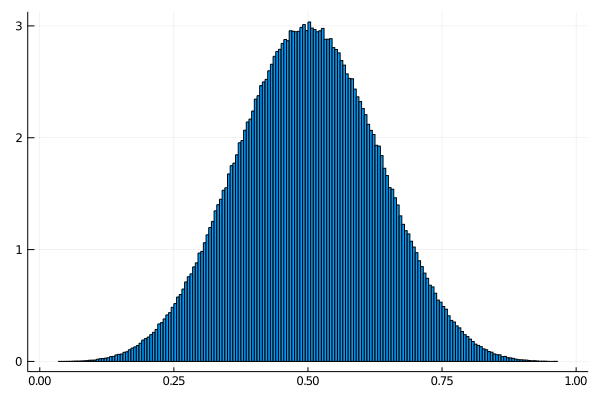

In [16]:
# solution
histogram([mean(rand() for _ in 1:5) for _ in 1:10^6], normed = true, label = "")

## Problem 5

Compute the sample maximum (that is, the plug-in estimator for the distribution maximum) for five observations from the uniform distribution on $[0,1]$. Repeat a million times and make a histogram of the resulting million sample maximum values. Does the sample mean appear to be unbiased?

# worksheet
*Solution*. 

# solution
*Solution*. Yes, it's definitely biased: 

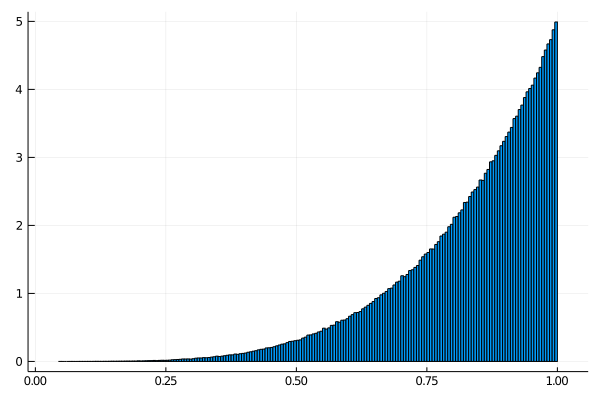

In [17]:
# solution
histogram([maximum(rand() for _ in 1:5) for _ in 1:10^6], normed = true, label = "")

The **standard error** of an estimator is its standard deviation.  

## Problem 6

Estimate the standard error of the sample maximum estimator (same as the previous problem: five observations from the uniform distribution on [0,1]). 

In [21]:
sample_maxes = [maximum(rand(5)) for _ in 1:1_000_000]
mean(sample_maxes)
sqrt(mean((x - 5/6)^2 for x in sample_maxes))

0.14088199361063788

In [19]:
var(maximum(rand() for _ in 1:5) for _ in 1:10^6)

0.01984518191640794

In [22]:
check_var_sample_max(0.0198)

"correct! The variance is 5/252"

In [23]:
# solution
using SymPy
@vars x
F = x^5
f = diff(F,x)
#plot(0:0.1:1, f, label = "density", legend = :topleft)
μ = integrate(x*f,(x,0,1))
integrate((x-μ)^2*f,(x,0,1))

5/252

# worksheet
*Solution.*

An estimator is **consistent** if $\widehat{\theta} \to \theta$ in probability as $n\to\infty$. This happens if and only if both the bias and the standard error go to zero as $n\to\infty$.

---
# Confidence Intervals

## Problem 7

(a) Approximate the mean of the distribution which generated the values stored in the vector `mysample`. 

In [24]:
mysample

10-element Array{Float64,1}:
 -0.3158449050816192
  1.0231649888798504
  1.9117770902002116
  2.504598442341676
  4.968809090699897
 -2.4899557184464394
  3.0741347708680196
  5.148240637619786
  2.101505157727294
  1.3321877268998883

In [25]:
mean(mysample)

1.9258617281708563

(b) If one were to propose that the mean of the underlying distribution that generated these data is 2, would you find that implausible? How about 6?

# solution
*Solution*. 

---

**Confidence intervals** are estimators with error bars. In other words, rather than returning a single value as our estimator, we return an entire interval together with a confidence level $1-\alpha$. We're saying that the probability that that interval traps the true value of the statistical functional is at least $1-\alpha$.


## Problem 8

The distribution that the entries of `mysample` were drawn from is normal with unknown mean $\mu$ and variance $\sigma^2$. The distribution of the sample mean is therefore also normal. Use this information find a 95% confidence interval for the mean $\mu$.

In [27]:
mysample

10-element Array{Float64,1}:
 -0.3158449050816192
  1.0231649888798504
  1.9117770902002116
  2.504598442341676
  4.968809090699897
 -2.4899557184464394
  3.0741347708680196
  5.148240637619786
  2.101505157727294
  1.3321877268998883

# worksheet
*Solution*. 

In [26]:
mean(mysample), std(mysample)

(1.9258617281708563, 2.285698852959919)

In [28]:
μ̂, σ̂, n = mean(mysample), std(mysample), length(mysample)

(1.9258617281708563, 2.285698852959919, 10)

In [29]:
(μ̂ - 1.96σ̂/√(n), μ̂ + 1.96σ̂/√(n))

(0.5091709017356787, 3.342552554606034)

# solution
*Solution*. The value of the sample mean is 1.93, and the estimated variance is 5.22. Therefore, a 95% confidence interval would extend from $1.93 - 1.96\cdot \sqrt{5.22}/10$ to $1.93 + 1.96\cdot \sqrt{5.22}/10$. 

In [30]:
# solution
mean(mysample) - 1.96std(mysample)/sqrt(10), mean(mysample) + 1.96std(mysample)/sqrt(10)

(0.5091709017356787, 3.342552554606034)

---

## Problem 9

Write a function which accepts a vector as an argument, returns a 95\% confidence interval for the mean of the distribution that the observations in the vector were drawn from (using the normal approximation). Run the function `traps_mean` several times to see whether your confidence interval does trap the true mean about 95% of the time.

In [33]:
function confidence_interval_mean(X)
    μ̂, σ̂I , n = mean(X), std(X), length(X)
    (μ̂ - 1.96σ̂/√(n), μ̂ + 1.96σ̂/√(n))
end

confidence_interval_mean (generic function with 1 method)

In [36]:
traps_mean(confidence_interval_mean)

X is [-12.01, 11.61, -7.85, 14.07, 5.19]
confidence interval is [-7.993667344414754, 12.397477094156436]
actual mean of underlying distribution is 2.1501953339189903
interval traps 2.1501953339189903


true

---

## Problem 10

Write a function which accepts a vector as an argument, returns a 95\% confidence interval for the maximum of the distribution that the observations in the vector were drawn from (using the assumption that the distribution is uniform on $[0,b]$ for some unknown $b$.). Run the function `traps_max` several times to see whether your confidence interval does trap the true mean about 95% of the time.

In [39]:
function confidence_interval_max(X)
    M, n = maximum(X), length(X)
    (M, M/0.05^(1/n))
end

confidence_interval_max (generic function with 1 method)

In [40]:
traps_max(confidence_interval_max)

X is [63.38, 58.15, 67.65, 21.54, 33.49, 26.38, 34.95, 29.47, 10.77, 31.95, 51.42, 58.3, 65.58, 56.65, 34.04, 8.52, 21.63]
confidence interval is (67.65492392195057, 80.69201976518654)
actual max of underlying distribution is 67.67468683663263
interval traps 67.67468683663263


true

In [37]:
# solution
function confidence_interval_max(X)
    b̂, n = maximum(X), length(X)
    (b̂, b̂ / 0.05^(1/n))
end

confidence_interval_max (generic function with 1 method)

In [38]:
# solution
traps_max(confidence_interval_max)

X is [11.84, 8.6, 18.64, 28.81, 5.55, 0.82, 0.65, 30.08, 17.67]
confidence interval is (30.081740832065755, 41.962548257461904)
actual max of underlying distribution is 32.211153863543984
interval traps 32.211153863543984


true

## Problem 11

Write your own function `traps_mean` which accepts three arguments: 
* `confidence_interval`: a function which takes a vector of observations and returns a confidence interval for the mean of the distribution the generated the observations
* `D`: a distribution (from the package `Distributions`, like `Uniform(0,1)`, or `Poisson(3)`, etc.)
* `n`: number of observations
`traps_mean` should return `true` if the mean of the distribution (`mean(D)`) is in the confidence interval and `false` if not.

`traps_mean` should print the confidence interval and the true mean, and it should return `true` or `false` depending on whether the confidence interval does trap the mean. 

In [ ]:
function traps_mean(confidence_interval, D, n)
    sample = rand(D,n) # solution
    a,b = confidence_interval(sample) # solution
    μ = mean(D) # solution
    println("Confidence interval: (", a, ",", b,")")
    println("Actual mean: ", μ)
    a ≤ μ ≤ b # solution
end

traps_mean(confidence_interval_mean, Uniform(3,7), 10)